## Load Data and Initial Grid Search

In [2]:
# Assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'
HANNAH = ''
ZIXUN = ''

ROOT_DIR = YASH
os.chdir(ROOT_DIR + 'testing-framework/')

DATA_NAME = 'batch0-agriVision-red-fourier'
GROUP = 'band'
SKIP_OPTIMIZE_STEP = True
CONSTANT_SAMPLE_SIZE = int(1e5)

# os.mkdir(DATA_NAME)
# os.mkdir(os.path.join(DATA_NAME, "CSVs"))
# os.mkdir(os.path.join(DATA_NAME, "plots"))

In [3]:
from utilities import *
from plot_utilities import *
''' Comment out the below two lines if you do not have Matlab installed and opened'''
np.random.seed(0)

ModuleNotFoundError: No module named 'matlab'

In [13]:
''' Only need to run commented code once'''
# data_df = pd.read_pickle(f'../transformed-data/{DATA_NAME}.pickle')
# min_group, max_group = MIN_GROUP, MAX_GROUP
# group_data_map = dict()
# for group in tqdm(range(min_group, max_group + 1)):
#     data = data_df[(data_df[GROUP] == group)]['data'].iloc[0]
#     group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
# pd.to_pickle(group_data_map, f'{DATA_NAME}/group_data_map.pickle')


group_data_map = pd.read_pickle(f'{DATA_NAME}/group_data_map.pickle')
min_group, max_group = 2, sorted(group_data_map)[-1]
GROUPS = np.arange(min_group, max_group+1)[::3]
cdfs_list = [i for i in os.listdir("CDFs/")]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
group_data_map

{2: array([-1873567.57545128, -1053179.8787024 ,  -796493.26641837, ...,
          515611.32466596,   727750.08372861,  1415108.31205171]),
 3: array([-1381549.02152627,  -763055.55500042,  -548014.21084637, ...,
          589870.47852803,   913509.42230273,  1238660.04281645]),
 4: array([-2330130.2827529 ,  -674637.29240126,  -458216.00461442, ...,
          508660.88125927,   585236.36938   ,  2057933.62120007]),
 5: array([-1017174.71914675,  -435604.60897782,  -317982.40652345, ...,
          265999.58893947,   322868.52758475,   851106.94999612]),
 6: array([-974190.8368246 , -313719.18516119, -237784.46487028, ...,
         231214.87895289,  282025.83744904, 1271430.57120658]),
 7: array([-733658.01983573, -221695.28867591, -167415.30362761, ...,
         169749.61077154,  221541.59616218,  579375.51929436]),
 8: array([-529273.1183328 , -171472.19446027, -130349.75777288, ...,
         135871.11354272,  175151.97910627,  449714.38766825]),
 9: array([-560989.51905802, -134972.7

In [14]:
''' Only need to run commented code once'''
all_cdfs_df = pd.DataFrame({'(r,eta),cdf' : sorted(all_cdfs.items())})
all_cdfs_df['r'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[0])
all_cdfs_df['eta'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[1])
all_cdfs_df['cdf'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[1])
all_cdfs_df['variance'] = np.nan_to_num(all_cdfs_df.apply(lambda row : variance_prior(row.loc['r'], row.loc['eta']), axis = 1))
all_cdfs_df['kurtosis'] = all_cdfs_df.apply(lambda row : kurtosis_prior(row.loc['r'], row.loc['eta']), axis = 1)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
group_cdf_df_dict = dict()

all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:784: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:789: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:789: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:789: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.ga

,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.02, 0), <scipy.interpolate._fitpack2.Inter...",0.02,0.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,4.553186e+99,NaN
1,"((0.02, 0.1), <scipy.interpolate._fitpack2.Int...",0.02,0.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.560477e+100,NaN
2,"((0.02, 0.2), <scipy.interpolate._fitpack2.Int...",0.02,0.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,6.013272e+101,NaN
3,"((0.02, 0.3), <scipy.interpolate._fitpack2.Int...",0.02,0.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.824903e+102,NaN
4,"((0.02, 0.4), <scipy.interpolate._fitpack2.Int...",0.02,0.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.104347e+103,NaN


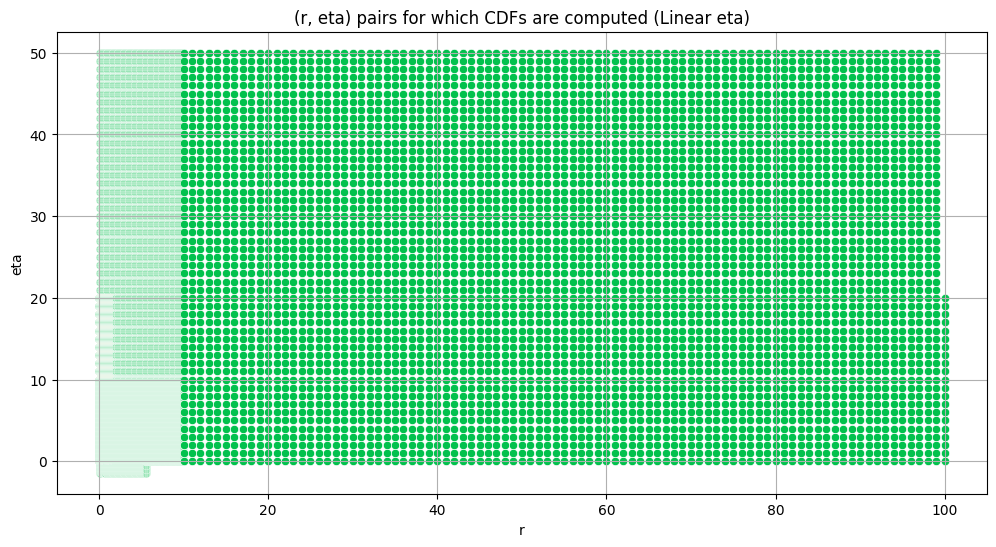

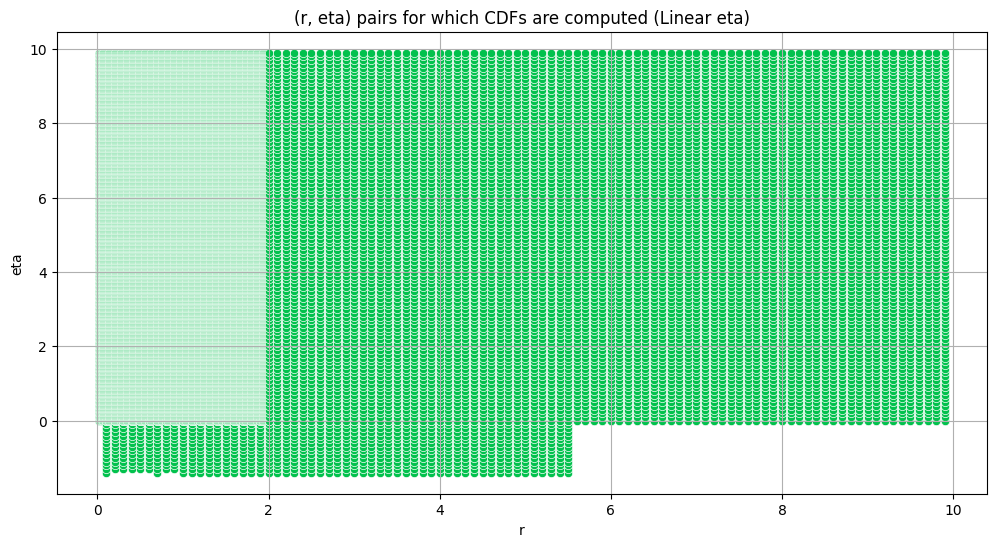

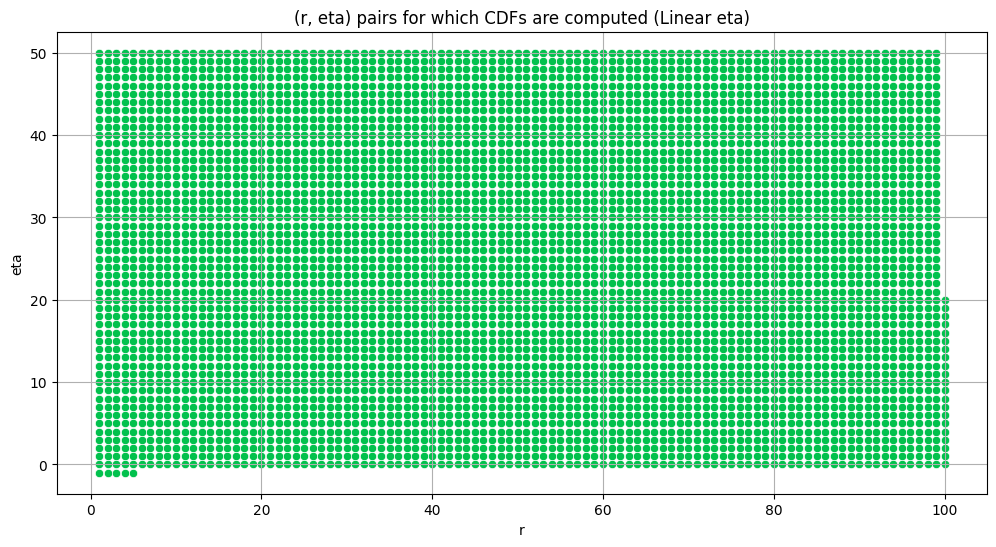

c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,r,eta,variance,kurtosis
count,39290.000000,39290.000000,3.929000e+04,3.842400e+04
mean,8.772613,10.260685,inf,inf
std,19.156853,11.641313,inf,NaN
min,0.020000,-1.400000,0.000000e+00,1.367588e-03
25%,0.870000,3.000000,9.833955e-01,7.405436e-02
50%,1.720000,6.500000,1.974566e+00,2.579904e-01
75%,6.300000,9.900000,9.379739e+00,6.507942e-01
max,100.000000,50.000000,1.797693e+308,inf


In [15]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [16]:
def create_ci_scatter_plot(group_cdf_df, values_dict, metric='variance', group=None):
    ci_levels = [50, 80, 95, 99, 99.9, 99.99]
    thresholds = [np.percentile(values_dict[group], [(100 - ci)/2, ci/2]) for ci in ci_levels]

    fig, ax = plt.subplots(figsize=(8, 6))
    cmap = plt.get_cmap('viridis')
    norm = mcolors.Normalize(vmin=0, vmax=len(ci_levels))

    scatter_collection = []
    for i, (lower, upper) in enumerate(reversed(thresholds)):
        mask = (group_cdf_df[metric] >= lower) & (group_cdf_df[metric] <= upper)
        color = cmap(norm(i))
        scatter = ax.scatter(group_cdf_df.loc[mask, 'r'], group_cdf_df.loc[mask, 'eta'], 
                   c=[color], s=20, alpha=0.7, label=f'{ci_levels[-(i+1)]}% CI')
        scatter_collection.append(scatter)

    ax.set_xlabel('r')
    ax.set_ylabel('eta')
    ax.set_title(f'{metric.capitalize()} Scatter Plot for {group}')

    plt.legend()
    plt.show()
    return fig


 Band 2


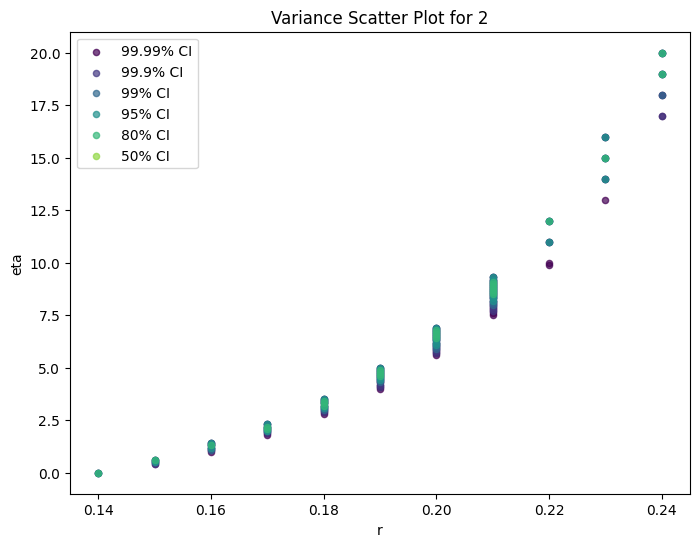

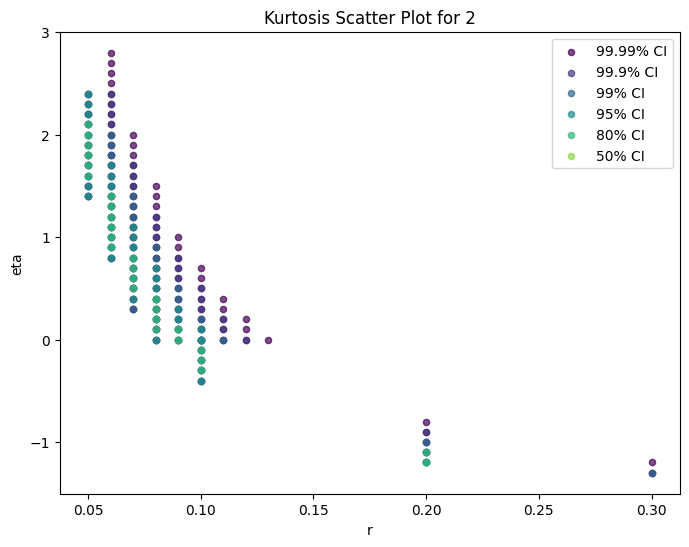


 Band 5


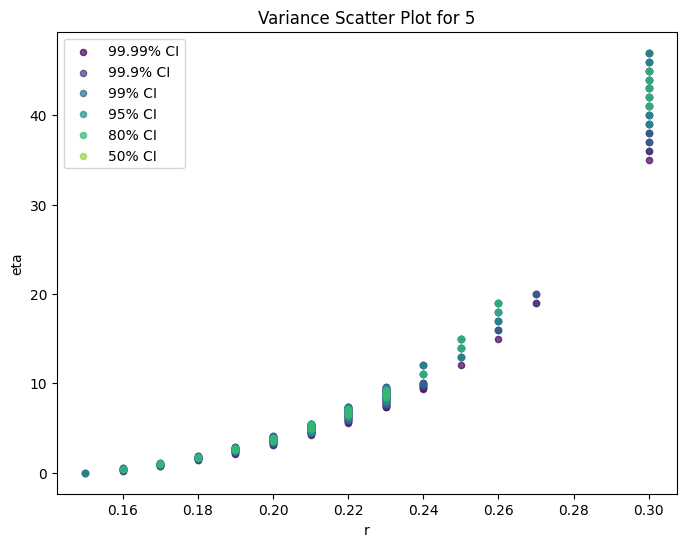

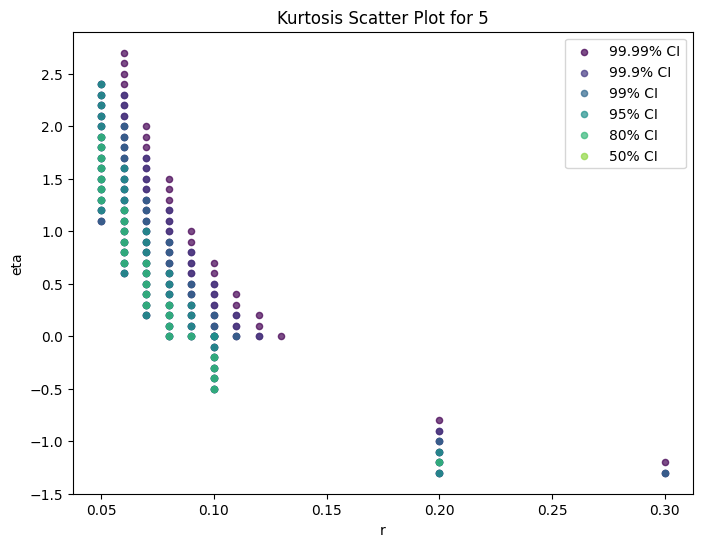


 Band 8


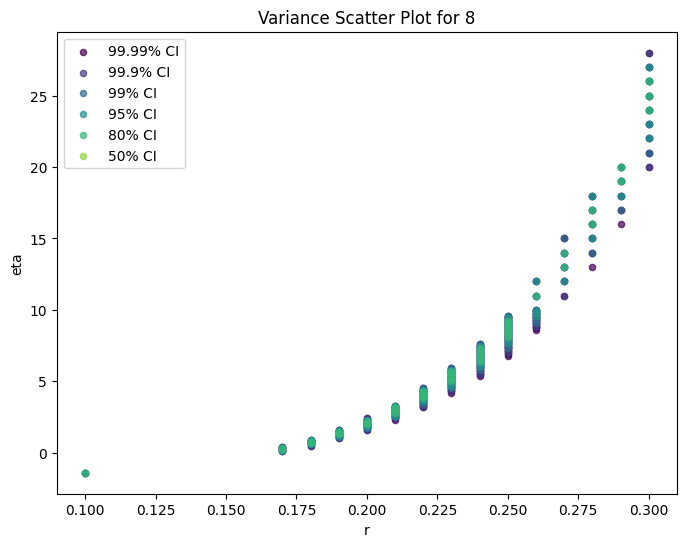

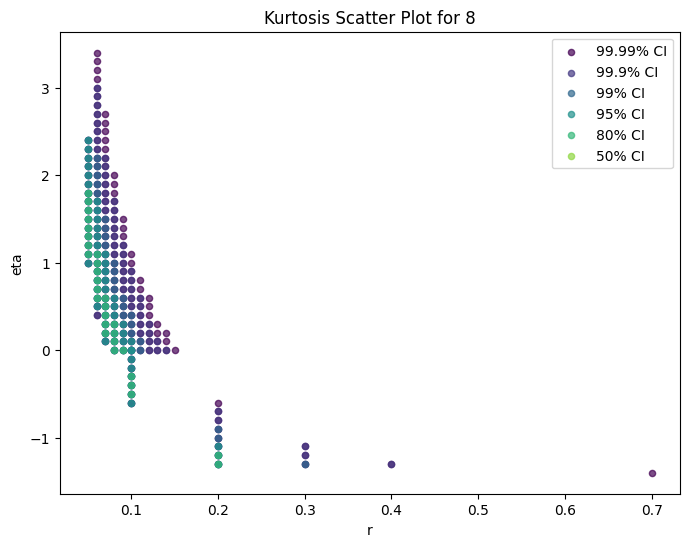


 Band 11


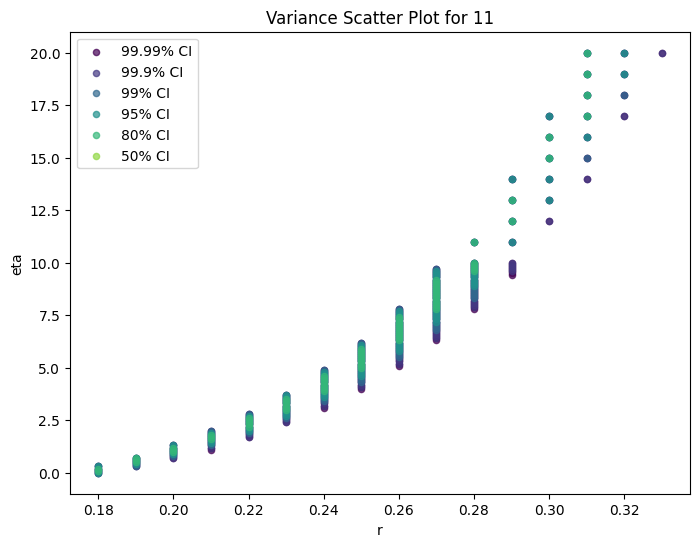

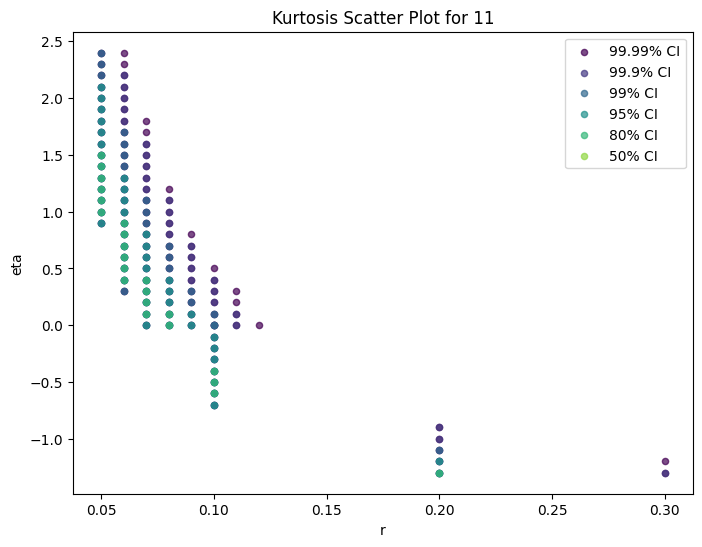


 Band 14


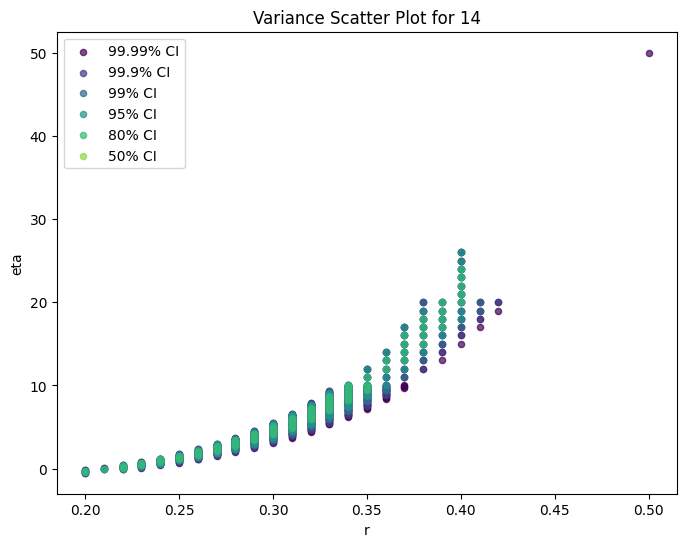

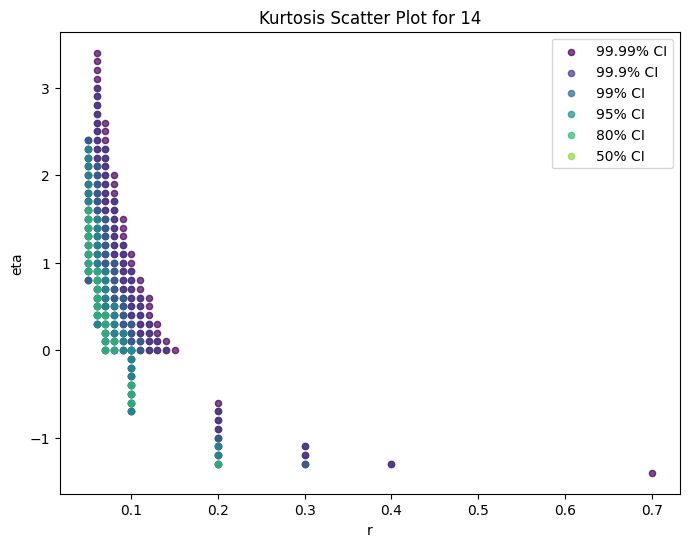

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper
band,,,,,,
2,2.255065e+08,7.743420e+07,1.091571e+09,3806.588839,89.550346,6465.387155
5,4.176875e+07,9.630453e+06,3.036489e+08,9642.644684,91.685580,8169.006945
8,9.222690e+06,1.556645e+06,7.912603e+07,14437.044067,58.568759,8805.860745
11,3.415253e+07,3.165396e+05,5.173440e+08,47580.866918,98.741601,9954.073755
14,2.444517e+05,1.178400e+04,2.786997e+06,38514.896774,57.926155,9792.148715


In [17]:
''' Only need to run commented code once'''
n_bootstrap = int(1e4)
bootstrap_size = int(1e4)
ci = 0.999
eps_var = 50
eps_kurt = 5
    
for group in GROUPS:
    print(f'\n {GROUP.capitalize()} {group}')
    obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], n_bootstrap=n_bootstrap, bootstrap_size=min(group_data_map[group].size, bootstrap_size), metric= np.var, ci=ci)
    obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], n_bootstrap=n_bootstrap, bootstrap_size=min(group_data_map[group].size, bootstrap_size), metric= stats.kurtosis, ci=ci)  
    group_cdf_df = all_cdfs_df.copy()
    group_cdf_df['pass_var'] = (group_cdf_df['variance'] > var_lower) & (group_cdf_df['variance'] < var_upper)
    group_cdf_df['pass_kurt'] = (group_cdf_df['kurtosis'] > kurt_lower) & (group_cdf_df['kurtosis'] < kurt_upper)
    group_cdf_df['pass_eps_var'] = (group_cdf_df['variance'] > var_lower - eps_var) & (group_cdf_df['variance'] < var_upper + eps_var)
    group_cdf_df['pass_eps_kurt'] = (group_cdf_df['kurtosis'] > kurt_lower - eps_kurt) & (group_cdf_df['kurtosis'] < kurt_upper + eps_kurt)

    master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
    master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
    group_cdf_df_dict[group] = group_cdf_df
    fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
    fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

    fig_var.savefig(f'{DATA_NAME}/plots/ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.png', bbox_inches='tight')
    plt.close(fig_var)
    fig_kurt.savefig(f'{DATA_NAME}/plots/ci_scatter_kurtosis_{GROUP}_{group}_bootstrap{n_bootstrap}.png', bbox_inches='tight')
    plt.close(fig_kurt)

pd.to_pickle(var_values_dict, f'{DATA_NAME}/var_values_dict_{n_bootstrap}_{bootstrap_size}.pickle')
pd.to_pickle(kurt_values_dict, f'{DATA_NAME}/kurt_values_dict_{n_bootstrap}_{bootstrap_size}.pickle')
master_df.to_csv(f'{DATA_NAME}/CSVs/initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv')
pd.to_pickle(group_cdf_df_dict, f"{DATA_NAME}/group_cdf_df_dict_initial.pickle")

group_cdf_df_dict = pd.read_pickle(f"{DATA_NAME}/group_cdf_df_dict_initial.pickle")
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv', index_col=GROUP)
master_df

In [18]:
def gen_gamma_mean(r, eta):
    return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)

def gen_gamma_variance(r, eta):
    mean = gen_gamma_mean(r, eta)
    second_moment = scipy.special.gamma((eta+3.5)/r) / scipy.special.gamma((eta+1.5)/r)
    return second_moment - mean**2

def find_eta_for_target_mean(r, target_mean):
    def objective(eta):
        return (gen_gamma_mean(r, eta) - target_mean)**2
    result = scipy.optimize.minimize_scalar(objective)
    return result.x

C:\Users\yashd\AppData\Local\Temp\ipykernel_35344\1099617282.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


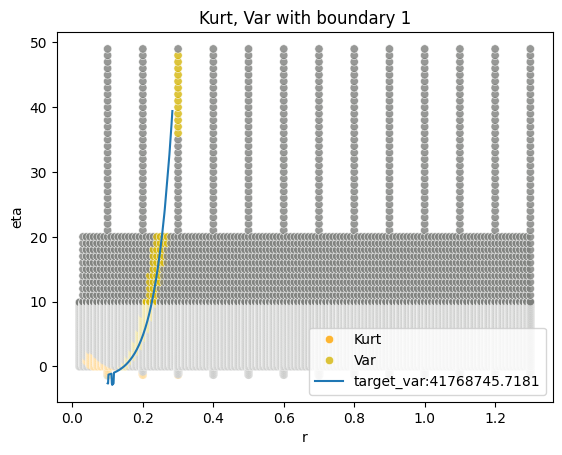

Lowest eta value: -2.6022522034267404


<Axes: title={'center': 'Kurt, Var with boundary 1'}, xlabel='r', ylabel='eta'>

In [21]:
def combo_map_plot(df, cols, extra_boundary = 0.5, plot_name = '', target_var = None):
    cols = sorted(cols)
    df = df.copy() 
    for col in cols:
        df[col] = df[col].replace({True: col[5:], False: ''})
    df['map'] = df.apply(lambda row : ''.join([row.loc[col].capitalize() +'' for col in cols]), axis = 1)
    temp = df[(df['map'] != '') & (df['map'] != 'Kurt')]
    df = df[(df['r'] >= temp['r'].min() - extra_boundary) & 
            (df['r'] <= temp['r'].max() + extra_boundary) &
            (df['eta'] >= temp['eta'].min() - extra_boundary) & 
            (df['eta'] <= temp['eta'].max() + extra_boundary)]
    fixed_palette = {
    'Var': 'xkcd:dark yellow',
    'Kstest': 'blue',
    'Kurt': 'orange',
    'KstestVar': 'cyan',
    'KurtVar': 'red',
    'KstestKurt': 'brown',
    'KstestKurtVar': 'xkcd:shamrock green',
    '': 'xkcd:medium gray'
}
    fig, ax = plt.subplots()
    fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=0.8)
    r_vals = []
    eta_vals = []
    if target_var:
        for r in np.linspace(0.1, df['r'].max() if df.shape[0] > 0 else 100, 1000):
            eta = find_eta_for_target_mean(r, target_var)
            if eta > df['eta'].max():
                break
            r_vals.append(r)
            eta_vals.append(eta)
        sns.lineplot(x=r_vals, y=eta_vals, label=f'target_var:{np.round(target_var, 4)}', ax=ax)

    plt.legend(loc = 'lower right')
    if plot_name:
        plt.title(plot_name)
    else:
        plt.title(f"{', '.join([col[5:].capitalize() for col in cols])} with boundary {extra_boundary}")
    plt.show()
    print("Lowest eta value:", eta_vals[0])
    return fig

#combo_map_plot(group_cdf_df_dict[2], ['pass_var','pass_kurt'])
group = 5
combo_map_plot(group_cdf_df_dict[group], ['pass_var','pass_kurt'], target_var = master_df.loc[group, 'obs_var'], extra_boundary=1)

####
Band  2
Number of samples: 100000


100%|██████████| 39290/39290 [17:40<00:00, 37.04it/s] 


Finding Minimum after computing 39290 CDFs


C:\Users\yashd\AppData\Local\Temp\ipykernel_35344\1099617282.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


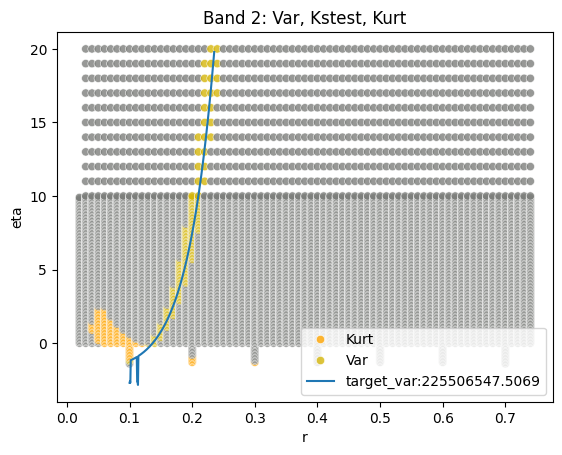

Lowest eta value: -2.6962583971255594
####
Band  5
Number of samples: 100000


100%|██████████| 39290/39290 [17:24<00:00, 37.60it/s]


Finding Minimum after computing 39290 CDFs


C:\Users\yashd\AppData\Local\Temp\ipykernel_35344\1099617282.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


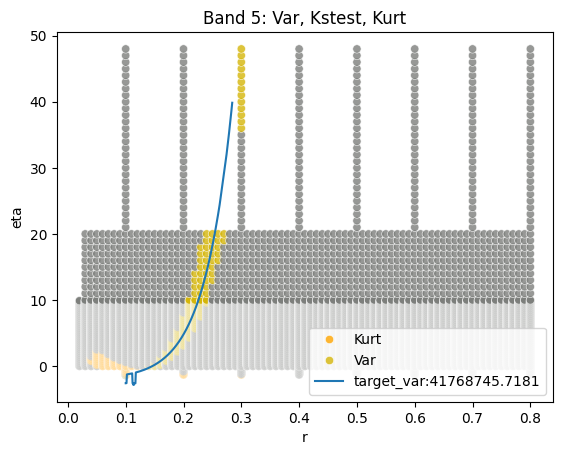

Lowest eta value: -2.6022522034267404
####
Band  8
Number of samples: 100000


100%|██████████| 39290/39290 [14:14<00:00, 45.98it/s] 


Finding Minimum after computing 39290 CDFs


C:\Users\yashd\AppData\Local\Temp\ipykernel_35344\1099617282.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


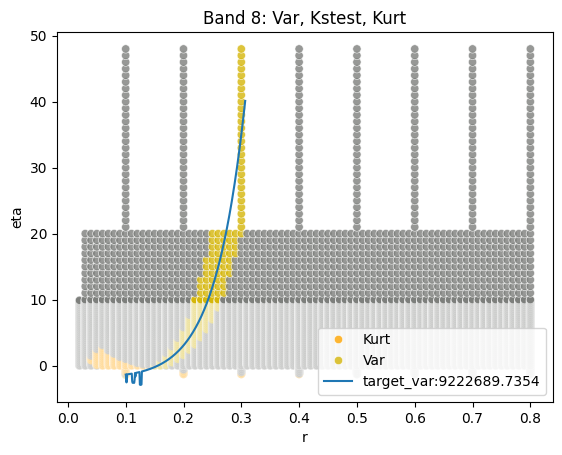

Lowest eta value: -1.3654540695685853
####
Band  11
Number of samples: 100000


100%|██████████| 39290/39290 [10:38<00:00, 61.56it/s] 


Finding Minimum after computing 39290 CDFs


C:\Users\yashd\AppData\Local\Temp\ipykernel_35344\1099617282.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


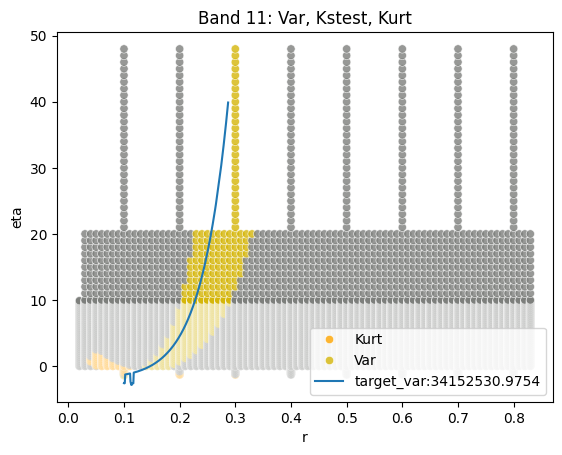

Lowest eta value: -2.5923608153268707
####
Band  14
Number of samples: 100000


100%|██████████| 39290/39290 [08:55<00:00, 73.33it/s] 


Finding Minimum after computing 39290 CDFs


C:\Users\yashd\AppData\Local\Temp\ipykernel_35344\1099617282.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


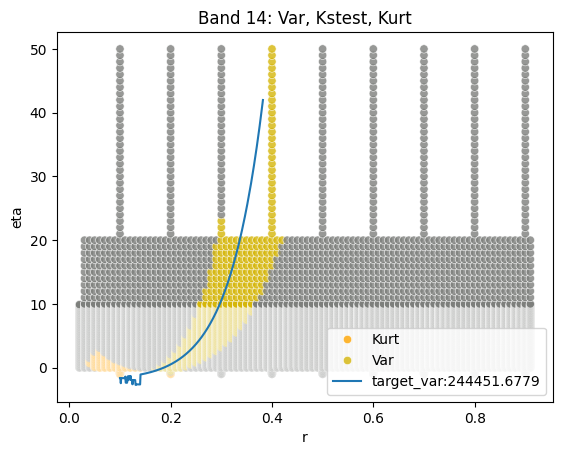

Lowest eta value: -1.6361140704322272


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,initial_r,initial_eta,num_samples,kstest_stat_initial,kstest_stat_cutoff_0.05
band,,,,,,,,,,,
2,2.255065e+08,7.743420e+07,1.091571e+09,3806.588839,89.550346,6465.387155,0.15,0.2,100000.0,0.020294,0.004293
5,4.176875e+07,9.630453e+06,3.036489e+08,9642.644684,91.685580,8169.006945,0.17,0.5,100000.0,0.016962,0.004293
8,9.222690e+06,1.556645e+06,7.912603e+07,14437.044067,58.568759,8805.860745,0.17,0.1,100000.0,0.016191,0.004293
11,3.415253e+07,3.165396e+05,5.173440e+08,47580.866918,98.741601,9954.073755,0.19,0.0,100000.0,0.022781,0.004293
14,2.444517e+05,1.178400e+04,2.786997e+06,38514.896774,57.926155,9792.148715,0.20,-0.6,100000.0,0.018912,0.004293


In [23]:
''' Only need to run commented code once'''
sorted_params = sorted(all_cdfs)
full_group_data_map = pd.read_pickle(f'{DATA_NAME}/group_data_map.pickle')

for i, group in enumerate(GROUPS):
    print(f"####\n{GROUP.capitalize()} ", group)
    sample = group_data_map[group]
    print(f"Number of samples: {sample.size}")
    group_cdf_df = group_cdf_df_dict[group]
    ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
    master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
    master_df.loc[group, 'num_samples'] = full_group_data_map[group].size
    master_df.loc[group, 'kstest_stat_initial'] = min_stat
    cutoff = stats.kstwo(n=sample.size).isf(0.05)
    master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff
    group_cdf_df['ksstat'] = ksstats
    group_cdf_df['pass_kstest'] = group_cdf_df['ksstat'].apply(lambda x: True if x < cutoff else False)
    group_cdf_df_dict[group] = group_cdf_df
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']

    fig = combo_map_plot(group_cdf_df_dict[group], cols, plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", target_var = master_df.loc[group, 'obs_var'])
    fig.figure.savefig(f'{DATA_NAME}/plots/full_grid_search_combo_plot_layer{group}.png', bbox_inches = 'tight', dpi=600)

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_combo.csv')
pd.to_pickle(group_cdf_df_dict, f"{DATA_NAME}/group_cdf_df_dict_full.pickle")

group_cdf_df_dict = pd.read_pickle(f"{DATA_NAME}/group_cdf_df_dict_full.pickle")
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_combo.csv', index_col=GROUP)
master_df

In [24]:
''' Only need to run commented code once'''
best_params_eta0 = []
for i, group in enumerate(GROUPS):
    if master_df.loc[group, 'initial_eta'] != 0:
        sample = group_data_map[group]
        group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
        group_cdfs = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
        ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, group_cdfs, debug=True)
        best_params_eta0.append(best_param_eta0[0])
        master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
    else:
        master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
        best_params_eta0.append(master_df.loc[group, 'initial_r'])
master_df['best_r_eta0'] = best_params_eta0
master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_eta0.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_eta0.csv', index_col=GROUP)
master_df

100%|██████████| 369/369 [00:04<00:00, 79.61it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:04<00:00, 88.86it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:04<00:00, 81.00it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:04<00:00, 78.42it/s]

Finding Minimum after computing 369 CDFs


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,initial_r,initial_eta,num_samples,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,best_r_eta0
band,,,,,,,,,,,,,
2,2.255065e+08,7.743420e+07,1.091571e+09,3806.588839,89.550346,6465.387155,0.15,0.2,100000.0,0.020294,0.004293,0.053826,0.14
5,4.176875e+07,9.630453e+06,3.036489e+08,9642.644684,91.685580,8169.006945,0.17,0.5,100000.0,0.016962,0.004293,0.056677,0.16
8,9.222690e+06,1.556645e+06,7.912603e+07,14437.044067,58.568759,8805.860745,0.17,0.1,100000.0,0.016191,0.004293,0.040174,0.17
11,3.415253e+07,3.165396e+05,5.173440e+08,47580.866918,98.741601,9954.073755,0.19,0.0,100000.0,0.022781,0.004293,0.022781,0.19
14,2.444517e+05,1.178400e+04,2.786997e+06,38514.896774,57.926155,9792.148715,0.20,-0.6,100000.0,0.018912,0.004293,0.029812,0.24


In [25]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, use_matlab=True, eng=eng)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, use_matlab=True, eng=eng)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, use_matlab=True, eng=eng, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [27]:
for i, group in enumerate(GROUPS):
    initial_param = np.array([master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']])
    print(f"\n{GROUP.capitalize()} {group}\nInitial param:", initial_param)
    bounds = np.array(list(zip(initial_param - 0.1, initial_param + 0.1))) 
    bounds = np.where(bounds < 0, 0, bounds)
    print("Bounds:", bounds)
    result = scipy.optimize.minimize(generate_func(group_data_map[group], distro='prior'),
                                        x0=initial_param, 
                                        bounds=bounds)
    print(result)
    best_r, best_eta = result.x[0], result.x[1]
    if result.fun < master_df.loc[group, 'kstest_stat_initial']:
        master_df.loc[group, 'best_r'], master_df.loc[group, 'best_eta'] = best_r, best_eta
        master_df.loc[group, 'kstest_stat_best'] = result.fun
    else:
        master_df.loc[group, 'best_r'], master_df.loc[group, 'best_eta'] = master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] 
        master_df.loc[group, 'kstest_stat_best'] = master_df.loc[group, 'kstest_stat_initial']
    print(f"% Reduction: {(master_df.loc[group,'kstest_stat_initial'] - result.fun)*100/result.fun}%")

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_optimize.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_optimize.csv', index_col=GROUP)
master_df


Band 2
Initial param: [0.15 0.2 ]
Bounds: [[0.05 0.25]
 [0.1  0.3 ]]


EngineError: Unknown exception

In [ ]:
group = 5
visualize_cdf(group_data_map[group], 
              all_cdfs = all_cdfs, 
              params= master_df.loc[group, 'initial_param'], 
              n_samples=10000, 
              interval = (-60, 40), 
              provided_loc = -100);

KeyError: 'initial_param'

In [ ]:
# r_d, eta_d = 3, 2 # Controls precision to which parameters are optimized
# SKIP_OPTIMIZE_STEP = True

# if SKIP_OPTIMIZE_STEP:
#     r_d, eta_d = 2, 1
#     master_df['kstest_stat_cd'] = master_df['kstest_stat_initial']
#     master_df[f'best_r_d{r_d}'] = master_df['initial_param'].apply(lambda x : x[0])
#     master_df[f'best_eta_d{eta_d}'] = master_df['initial_param'].apply(lambda x : x[1])

# else:
#     for group in GROUPS: 
#         sample = group_data_map[group]
#         initial_param = master_df.loc[group, 'initial_param']
#         master_df.loc[group, f'best_r_d{r_d}'], master_df.loc[group, f'best_eta_d{eta_d}'] = coord_descent_gengamma(sample, initial_param, 
#                                                                                                                     r_depth = r_d, eta_depth=eta_d, 
#                                                                                                                     use_matlab=False, group=group, 
#                                                                                                                     eng=eng, DATA_NAME=DATA_NAME)
#         master_df.loc[group, 'kstest_stat_cd'] = compute_ksstat(sample, combine_pickles(f'{DATA_NAME}_group{group}_10000')[(master_df.loc[group, f'best_r_d{r_d}'], master_df.loc[group, f'best_eta_d{eta_d}'])])
#         print(f"{GROUP} {group} best parameters: {master_df.loc[group, 'kstest_stat_cd']}")


# master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_cd'], row.loc['num_samples']), axis = 1)    
# master_df[['num_samples', 'initial_param', 'kstest_stat_initial', f'best_r_d{r_d}', f'best_eta_d{eta_d}', 'kstest_stat_cd', 'n_pval_0.05']].to_csv(f'{DATA_NAME}/CSVs/optimized_params.csv')
# master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv')

# master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv', index_col = GROUP)
# master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[group]['initial_param'][1:-1].split(',')) for group in master_df.index]
# master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,n_pval_0.05
layer,,,,,,,,,,
2,3180,"(0.39, 4.0)",0.021670,"(0.26, 0)",0.060374,0.024030,0.021670,0.39,4.0,4023
3,12720,"(0.44, 3.7)",0.008143,"(0.29, 0)",0.037031,0.012029,0.008143,0.44,3.7,28620
4,50880,"(0.44, 1.4)",0.006270,"(0.34, 0)",0.023245,0.006018,0.006270,0.44,1.4,48295
5,203520,"(0.47, 0.2)",0.005235,"(0.44, 0)",0.005645,0.003010,0.005235,0.47,0.2,64395
6,814080,"(0.74, 0.0)",0.020505,"(0.74, 0)",0.020505,0.001505,0.020505,0.74,0.0,4525
7,3256320,"(6.1, 0.0)",0.082279,"(6.1, 0)",0.082279,0.000753,0.082279,6.10,0.0,279
8,13025280,"(6.0, 0.0)",0.227356,"(6.0, 0)",0.227356,0.000376,0.227356,6.00,0.0,36


## Comparing Empirical and Computed CDF/PDF

Chebyshev bound: 972.0806660666007
Tail samples: 100


  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:03<00:00, 165.84it/s]


First CDF value: 2.9271846764342124e-23
Last CDF value: 1.0
Tail bound: 0.001


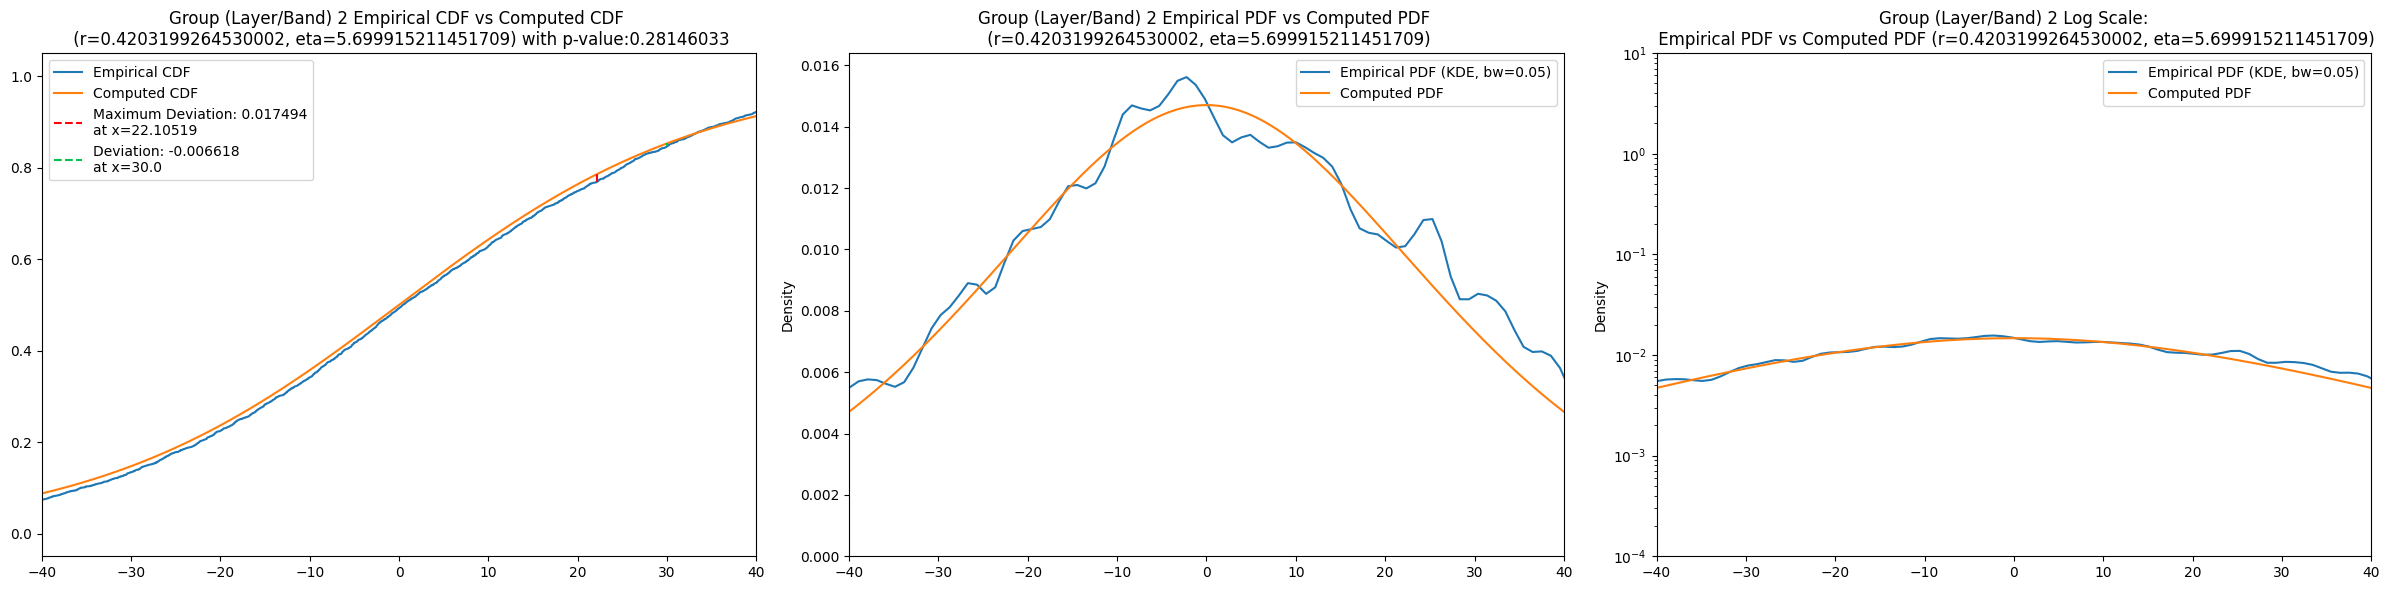

Chebyshev bound: 528.7844133798856
Tail samples: 100


100%|██████████| 500/500 [00:02<00:00, 201.14it/s]


First CDF value: 1.1020182135780432e-29
Last CDF value: 1.0
Tail bound: 0.001


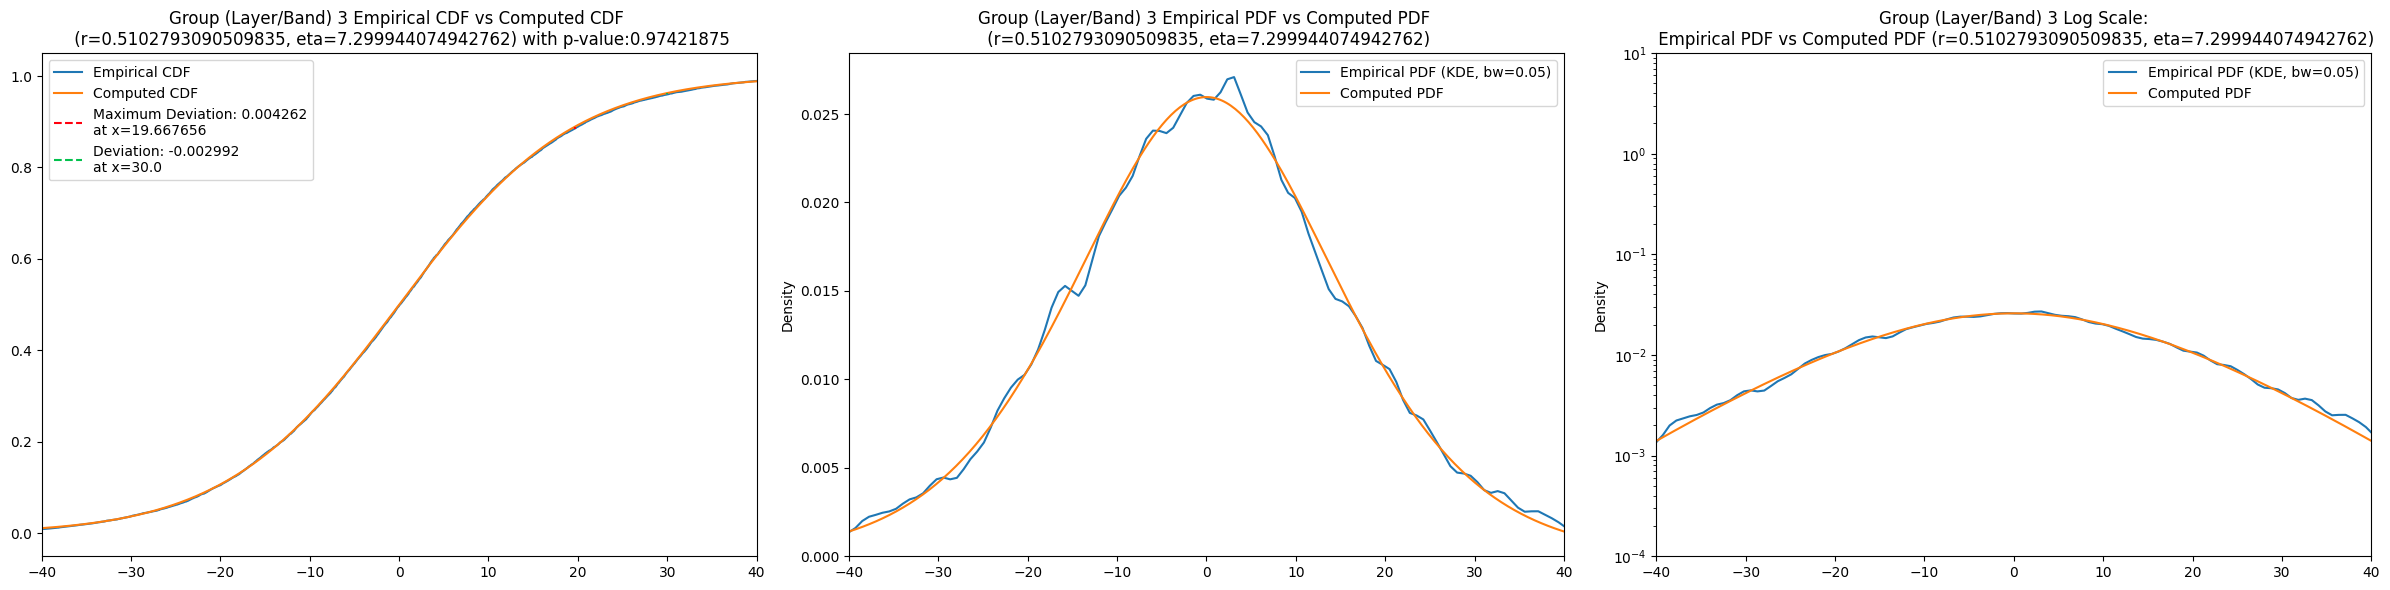

Chebyshev bound: 294.63698880680386
Tail samples: 100


100%|██████████| 500/500 [00:03<00:00, 166.22it/s]


First CDF value: 5.283862787572403e-16
Last CDF value: 0.9999999999999994
Tail bound: 0.001


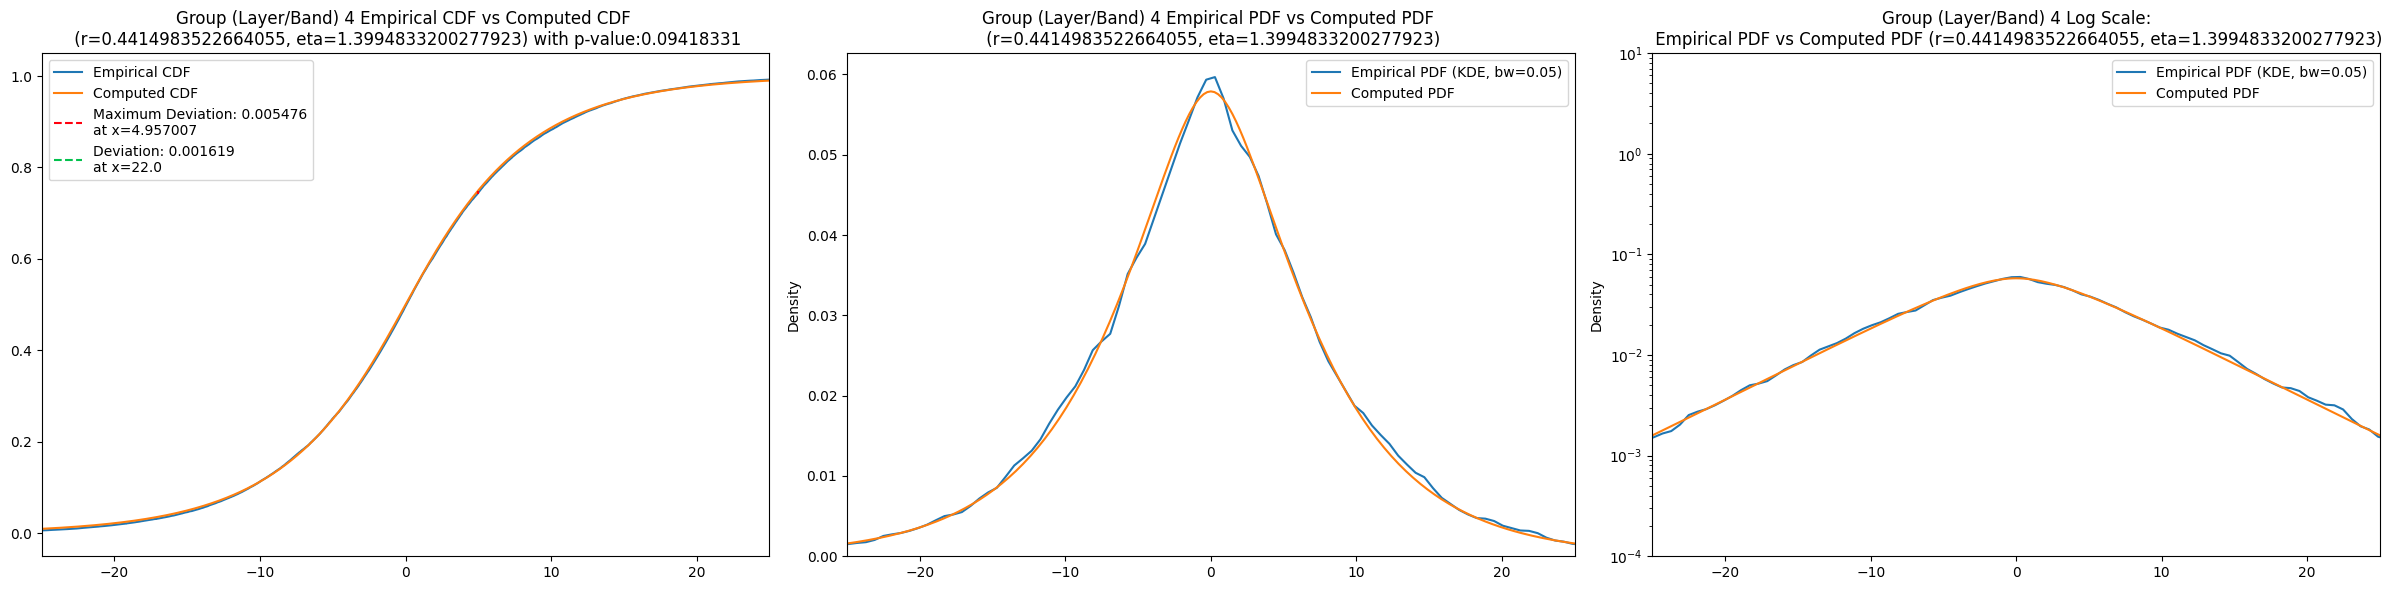

Chebyshev bound: 143.54848140072184
Tail samples: 100


100%|██████████| 500/500 [00:02<00:00, 183.97it/s]


First CDF value: 1.9090479317012896e-13
Last CDF value: 0.999999999999809
Tail bound: 0.001


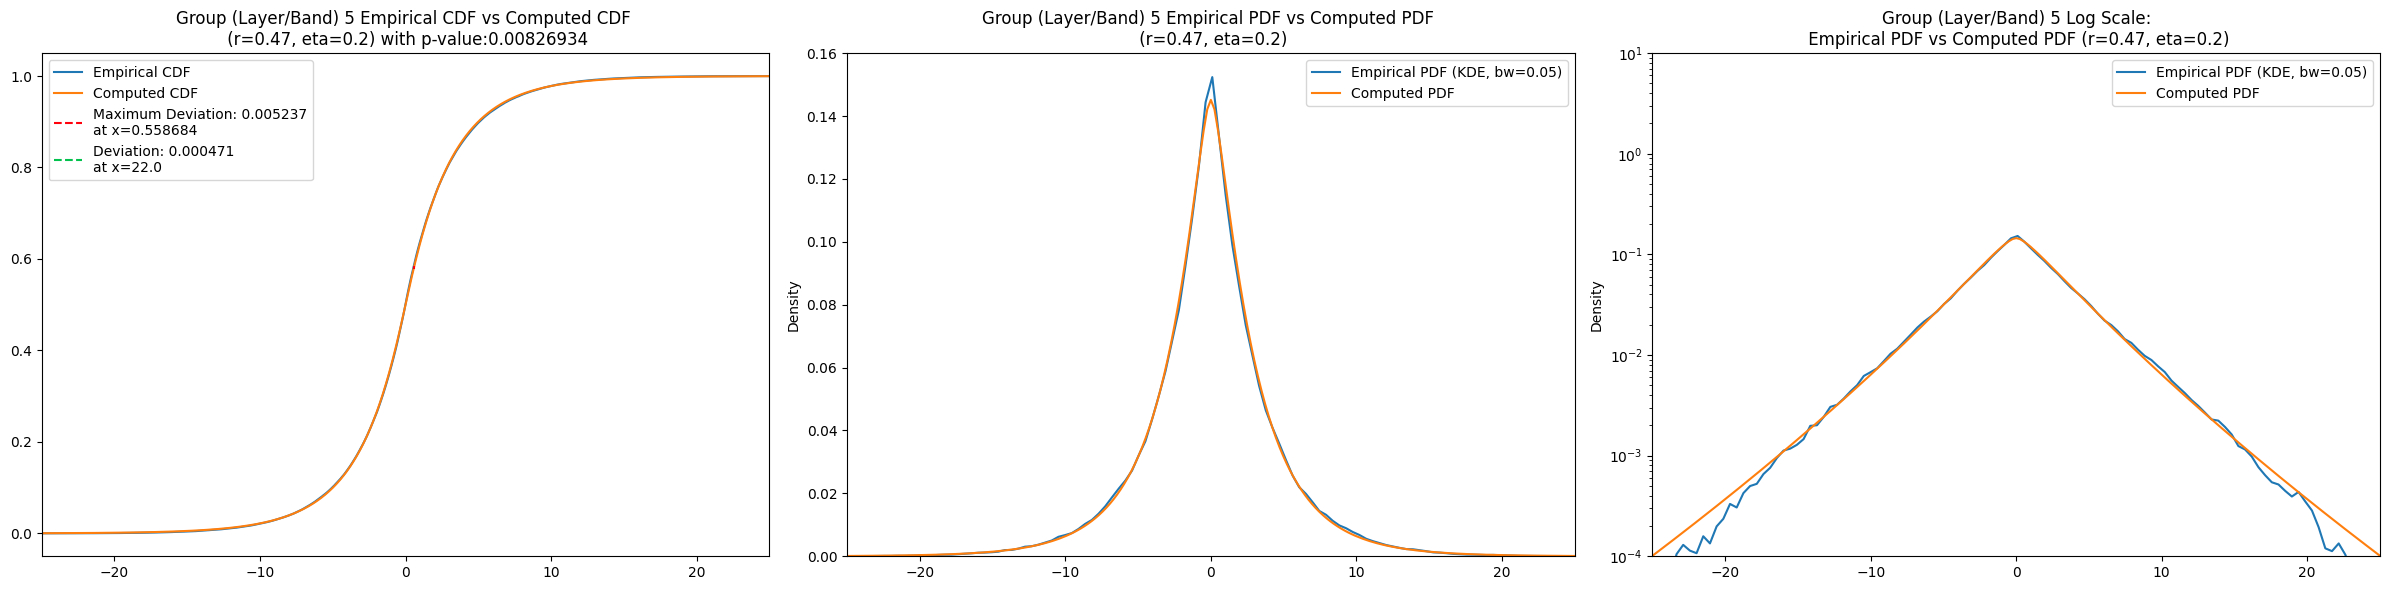

Chebyshev bound: 53.661101472994055
No tail


100%|██████████| 500/500 [00:03<00:00, 143.34it/s]


First CDF value: 1.7737306224217845e-18
Last CDF value: 1.0
Tail bound: 0.001


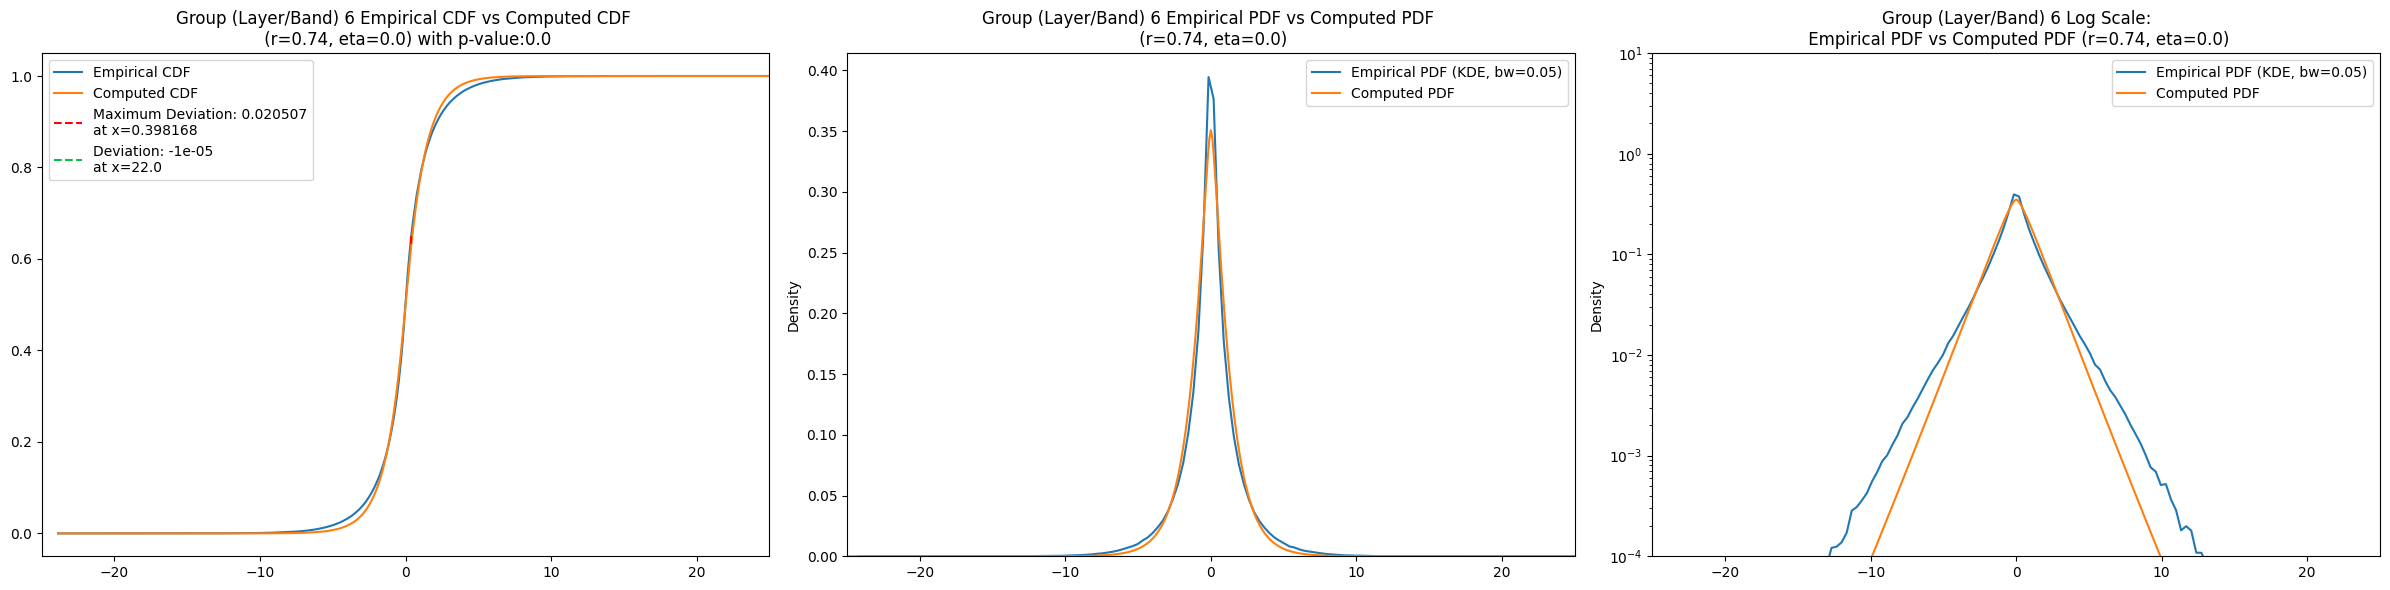

Chebyshev bound: 24.216785080421964
No tail


100%|██████████| 500/500 [00:03<00:00, 158.90it/s]


First CDF value: 6.387158039633434e-89
Last CDF value: 1.0
Tail bound: 0.001


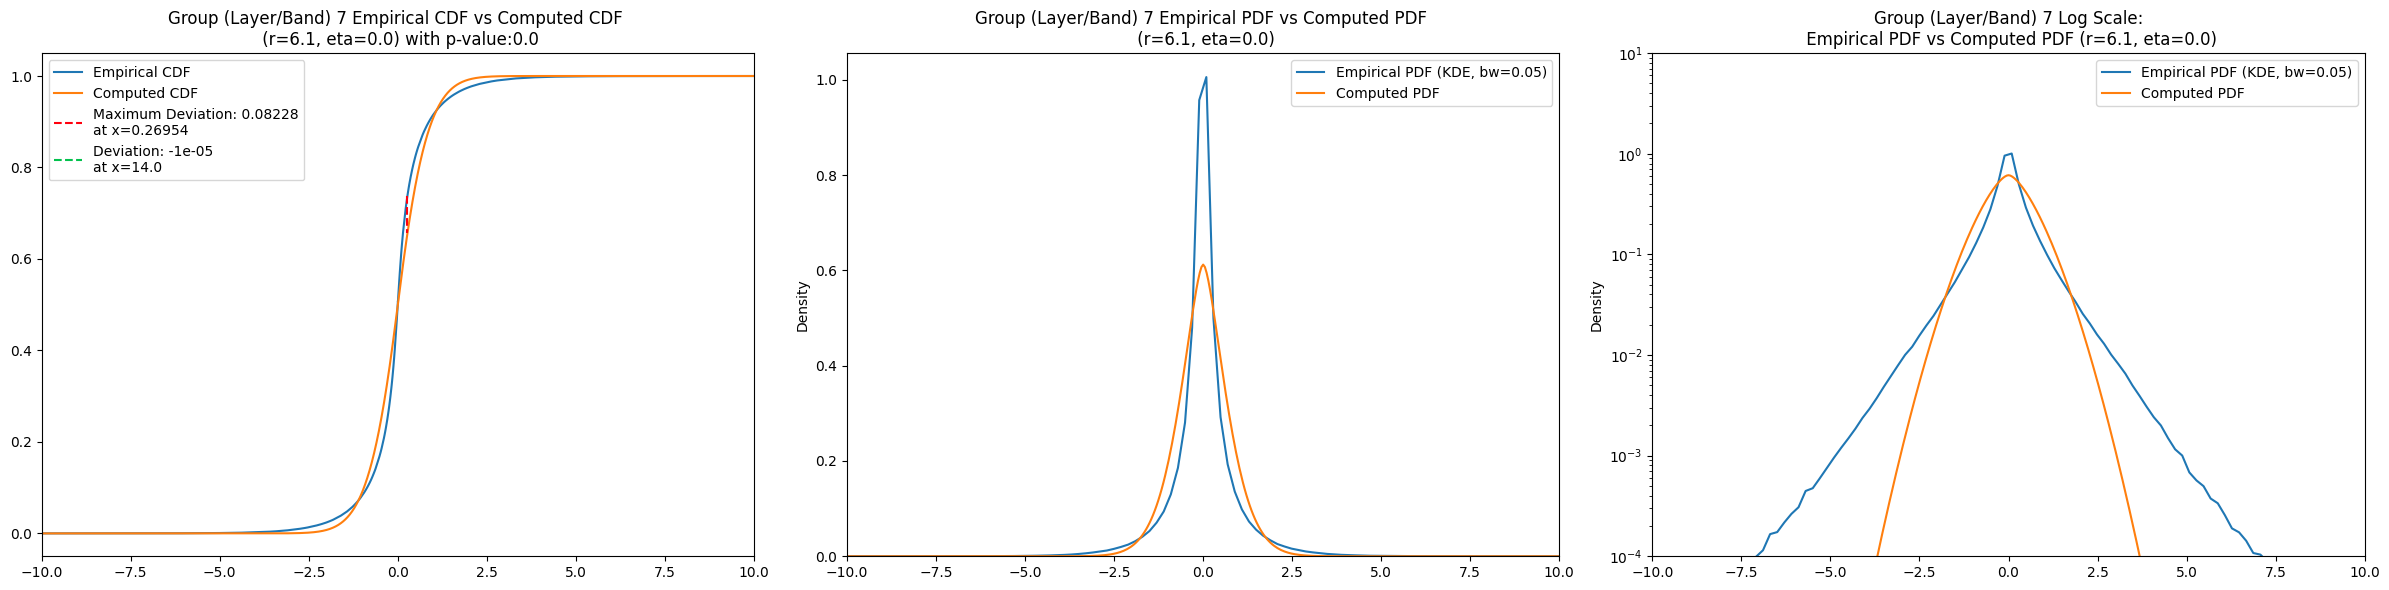

Chebyshev bound: 24.22423497919929
No tail


100%|██████████| 500/500 [00:03<00:00, 164.47it/s]


First CDF value: 1.7364613297819017e-88
Last CDF value: 1.0
Tail bound: 0.001


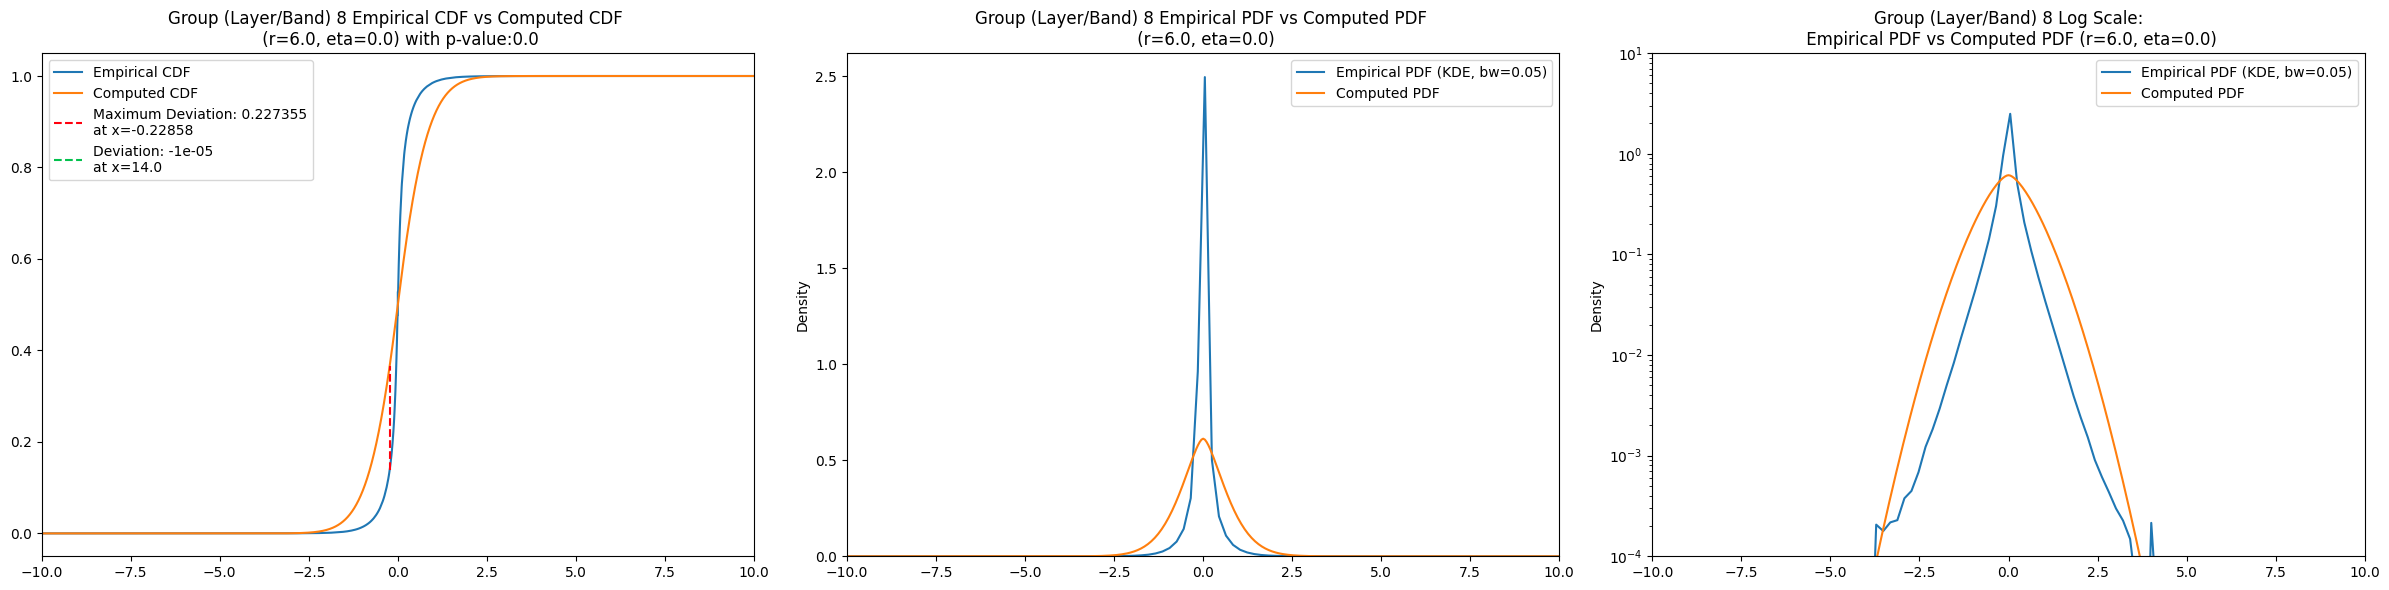

In [35]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(f'{DATA_NAME}/plots/compare_cdf_pdf_layer_{group}.png', bbox_inches = 'tight')

## Comparing with Gaussian and Laplace

In [38]:
for group in GROUPS:
    norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, 50))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, 50))
    t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, 50))
    
    master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

    master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
    master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

    master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_compare_priors.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_compare_priors.csv', index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,num_samples,kstest_stat_initial,kstest_stat_cutoff_0.05,initial_r,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,803.473892,736.385029,872.102147,0.094996,-0.146829,0.362276,3180.0,0.018069,0.024030,0.42,...,27.782300,0.019503,1.755550e-01,25.439100,0.036392,4.282210e-04,20.752800,0.036305,4.458110e-04,2.814600e-01
3,275.270192,261.649192,289.410296,0.374403,0.183631,0.595734,12720.0,0.004615,0.012029,0.51,...,16.031400,0.010128,1.460870e-01,14.012900,0.022665,4.151010e-06,11.277100,0.026410,3.854630e-08,9.742200e-01
4,80.847728,75.975027,85.694408,1.357251,0.954575,2.049270,50880.0,0.006270,0.006018,0.44,...,8.001070,0.020474,5.852830e-19,7.104980,0.014498,1.017140e-09,5.719650,0.018489,1.538450e-15,9.419400e-02
5,19.882305,18.476825,21.396311,3.074957,2.084542,5.844440,203520.0,0.005236,0.004293,0.47,...,3.590200,0.030178,1.856120e-161,3.138870,0.002344,2.129390e-01,2.574090,0.010570,3.529230e-20,2.840600e-05
6,4.187365,3.812586,4.732310,7.592764,3.603499,45.300214,814080.0,0.020507,0.004293,0.74,...,1.426190,0.042375,0.000000e+00,1.246800,0.014481,1.041130e-148,1.010540,0.017941,4.909420e-228,8.005500e-298
7,0.819285,0.729973,0.952453,13.123555,5.564446,60.728159,3256320.0,0.082284,0.004293,6.10,...,0.539656,0.052929,0.000000e+00,0.472760,0.025282,0.000000e+00,0.378321,0.026440,0.000000e+00,0.000000e+00
8,0.136744,0.114494,0.247803,172.661568,7.452769,829.748144,13025280.0,0.227351,0.004293,6.00,...,0.196027,0.056358,0.000000e+00,0.172569,0.029152,0.000000e+00,0.137349,0.028140,0.000000e+00,0.000000e+00


# Examining Tail Behavior

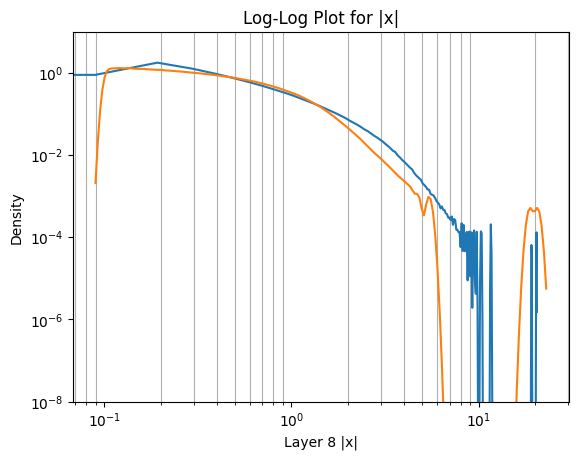

In [39]:
bw = 0.05
group = 7
x = np.abs(group_data_map[group])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {group} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')
plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_7.png', bbox_inches = 'tight')

bw = 0.05
group = 8
x = np.abs(group_data_map[group])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {group} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')
plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_8.png', bbox_inches = 'tight')


In [44]:
def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
    if metric_name == 'kstest_ratio':
        metric = compute_ksratio
    elif metric_name == 'kstest_stat':
        metric = compute_ksstat_tail

    for tail_cutoff in tail_cutoffs:
        metrics = []
        for layer in layers:
            if distro == 'gengamma':
                cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
            elif distro == 'gaussian':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
            elif distro == 'laplace':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
            elif distro == 't':
                cdf = stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
            metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
        master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
for group in GROUPS:
    add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
    add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
    add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
    add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
    add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df.csv', index_col = GROUP)
master_df

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:546: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,num_samples,kstest_stat_initial,kstest_stat_cutoff_0.05,initial_r,...,kstest_ratio_gengamma_tail0,kstest_ratio_gengamma_tail10,kstest_ratio_gaussian_tail0,kstest_ratio_gaussian_tail10,kstest_ratio_laplace_tail0,kstest_ratio_laplace_tail10,kstest_ratio_t_tail0,kstest_ratio_t_tail10,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,,,,,,,,,,,,,
2,803.473892,736.385029,872.102147,0.094996,-0.146829,0.362276,3180.0,0.018069,0.024030,0.42,...,"(0.1239, 1.0126)","(0.1239, 1.0126)","(0.9368, 1.9545)","(0.9368, 1.9545)","(0.95089, 7.3557)","(0.95089, 7.3557)","(0.015521, 1.04)","(0.015521, 1.04)",0.018069,0.018069
3,275.270192,261.649192,289.410296,0.374403,0.183631,0.595734,12720.0,0.004615,0.012029,0.51,...,"(0.25381, 1.016)","(0.25381, 1.016)","(0.96671, 76.943)","(0.96671, 76.943)","(0.96151, 2839.9)","(0.96151, 2839.9)","(0.0074015, 1.1147)","(0.0074015, 1.1147)",0.004615,0.003824
4,80.847728,75.975027,85.694408,1.357251,0.954575,2.049270,50880.0,0.006270,0.006018,0.44,...,"(0.098794, 1.0029)","(0.098794, 1.0029)","(0.93633, 391120.0)","(0.97872, 391120.0)","(0.95756, 119260000.0)","(0.95756, 119260000.0)","(0.003275, 1.0744)","(0.003275, 1.0176)",0.005812,0.005487
5,19.882305,18.476825,21.396311,3.074957,2.084542,5.844440,203520.0,0.005236,0.004293,0.47,...,"(0.28817, 3.9814)","(0.28817, 3.9814)","(0.90723, 1.8721999999999998e+35)","(0.98075, 1.8721999999999998e+35)","(0.95007, 1.8763e+47)","(0.97884, 1.8763e+47)","(0.006972, 1.0662)","(0.006972, 1.0104)",0.003322,0.001374
6,4.187365,3.812586,4.732310,7.592764,3.603499,45.300214,814080.0,0.020507,0.004293,0.74,...,"(0.9465, 4153.0)","(0.99916, 4153.0)","(0.87959, 3.0205e+57)","(0.99905, 3.0205e+57)","(0.9364, 2.0407000000000003e+76)","(0.99905, 2.0407000000000003e+76)","(0.011194, 1.2183)","(0.011194, 1.0041)",0.019269,0.000846
7,0.819285,0.729973,0.952453,13.123555,5.564446,60.728159,3256320.0,0.082284,0.004293,6.10,...,"(0.72842, 3.1291e+54)","(0.99998, 3.1291e+54)","(0.8501, 6.528000000000002e+269)","(0.99998, 6.528000000000002e+269)","(0.90641, inf)","(0.99998, inf)","(0.037871, 1.5063)","(0.037871, 1.0006)",0.016800,0.000030
8,0.136744,0.114494,0.247803,172.661568,7.452769,829.748144,13025280.0,0.227351,0.004293,6.00,...,"(0.13064, 5.1828000000000006e+51)","(1.0, 5.1828000000000006e+51)","(0.83653, inf)","(1.0, inf)","(0.89532, inf)","(1.0, inf)","(0.061503, 1.7144)","(0.37126, 1.0)",0.006442,0.000010


# Results

## KS-Test Statistics

In [45]:
#master_df.filter(regex='num_samples|kstest_stat.*')
#master_df.filter(regex='num_samples|param.*')
# master_df.filter(regex='.*gaussian')
master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,kstest_stat_best,kstest_stat_gaussian,kstest_stat_laplace,kstest_stat_t,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,
2,0.018069,0.024030,0.060346,0.017494,0.019503,0.036392,0.036305,0.018069,0.018069
3,0.004615,0.012029,0.037012,0.004262,0.010128,0.022665,0.026410,0.004615,0.003824
4,0.006270,0.006018,0.023319,0.005476,0.020474,0.014498,0.018489,0.005812,0.005487
5,0.005236,0.004293,0.005653,0.005236,0.030178,0.002344,0.010570,0.003322,0.001374
6,0.020507,0.004293,0.020507,0.020507,0.042375,0.014481,0.017941,0.019269,0.000846
7,0.082284,0.004293,0.082284,0.082216,0.052929,0.025282,0.026440,0.016800,0.000030
8,0.227351,0.004293,0.227351,0.227351,0.056358,0.029152,0.028140,0.006442,0.000010
